In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:

iris = datasets.load_iris()#Load the Iris dataset.
X = iris["data"][:, (2, 3)]  #  petal length, petal width
y = iris["target"]#Get the labels for each sample.

setosa_or_versicolor = (y == 0) | (y == 1)#Create a boolean mask to filter the data to only include samples of Setosa or Versicolor.
X = X[setosa_or_versicolor]#Apply the boolean mask to X 

y = y[setosa_or_versicolor]#and y to keep only the samples corresponding to Setosa and Versicolor.

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=100)#SVM classifier with a linear kernel and regularization parameter C set to 100.
svm_clf.fit(X, y);#Train the SVM classifier using the filtered data

#Defined to plot the decision boundary of the trained SVM classifier.
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]#Get the coefficients and intercept from the decision function of the trained SVM classifier.

#Compute the decision boundary, as well as the upper and lower margins (gutter_up and gutter_down), using the obtained coefficients.
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', alpha=.5)
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, alpha=.4)
    plt.plot(x0, gutter_down, "k--", linewidth=2, alpha=.4)

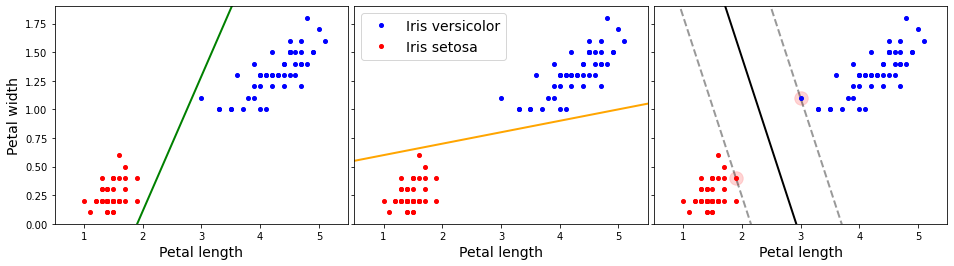

In [3]:

# Bad models
x0 = np.linspace(.5, 5.5, 200)#Create an array of 200 evenly spaced values between 0.5 and 5.5
pred_2 = 1.18 * x0 - 2.25
pred_3 = 0.1 * x0 + 0.5#These lines define two linear equations that represent the decision boundaries of two "bad" models.

gkw = {'wspace':.02}
fig, axes = plt.subplots(ncols=3, figsize=(16,4), sharey=True, gridspec_kw = gkw)

plt.sca(axes[0])
plt.plot(x0, pred_2, "g-", linewidth=2)#It plots the first "bad" model's decision boundary 
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", markersize=4, label="Iris versicolor")#plots the Iris versicolor 
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", markersize=4, label="Iris setosa")#and setosa data points using their petal lengths and widths.
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([.5, 5.5, 0, 1.9])

plt.sca(axes[1])
plt.plot(x0, pred_3, "-", color="orange", linewidth=2)#It plots the second "bad" model's decision boundary
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", markersize=4, label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", markersize=4, label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([.5, 5.5, 0, 1.9])

plt.sca(axes[2])
plot_svc_decision_boundary(svm_clf, 0, 5.5)#plot the SVM classifier's decision boundary and support vectors.
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", markersize=4, label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", markersize=4, label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.axis([.5, 5.5, 0, 1.9])

plt.show()

In [30]:
#Q: What does it mean to find the best possible separating hyperplane (linear decision boundary)?
#A: Maximum Margin
#A Maximum Margin algorithm is designed to achieve decision boundaries like the plot on the right,
# creating the widest possible margin between two classes ("maximum margin hyperplane" or "optimal separating hyperplane"). 
#Visually this looks like the widest possible road between the two clusters. 
#The solid center line of this road is the decision boundary and the dashed lines are the edges of each margin of the maximal margin hyperplane (in this 2-dimensional case the hyperplane is a line).




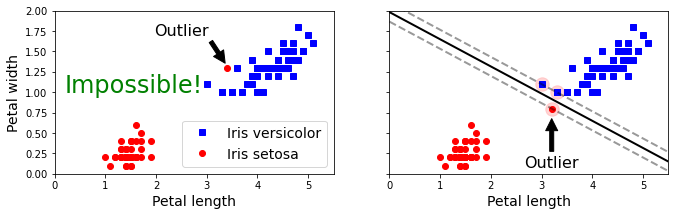

In [4]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])#Two outlier data points are defined with their corresponding labels
y_outliers = np.array([0, 0])#both labeled as class 0 (Iris Setosa)
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)#The first outlier is added to the original data X and y
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)#The second outlier is added to the original data, creating another dataset Xo2 with labels yo2
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)#An SVM classifier with a linear kernel is instantiated with a very high value of C (the regularization parameter).
#This high C value implies that the SVM will try very hard to correctly classify every point, making it sensitive to outliers.
svm_clf2.fit(Xo2, yo2)#The classifier is trained using the Xo2 dataset which includes the second outlier.

fig, axes = plt.subplots(ncols=2, figsize=(11,3), sharey=True)
#It plots the Xo1 dataset points, marking them according to their yo1 labels.
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs", label="Iris versicolor")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "ro", label="Iris setosa")
plt.text(0.2, 1.0, "Impossible!", fontsize=24, color="green")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0]-.02, X_outliers[0][1]+.04),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
#It plots the Xo2 dataset points, marking them according to their yo2 labels.
plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "ro")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)#plot the decision boundary of the newly trained SVM (with the second outlier).
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]-.1),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

In [32]:
#Q: What if perfectly separating the classes is not possible with a linear decision boundary?
#A: Drop hard margin requirement in favor of soft margin
#In the above two plots, the maximum margin algorithm fails in different ways. On the left, a linear decision boundary is not even possible. On the right, the maximum margin algorithm is able to fit a linear decision boundary, but one support vector (setosa instance - red) is an outlier that moves the decision boundary far from where it would have been without the outlier. The decision boundary without the outlier is intuitively a better fit that will generalize better.

#The algorithm failed because of the "hard margin" requiring every data point to be "off the road." Elegant maximum margin classifiers rarely fit real world data in ways that generalize well. A more flexible model is needed.

#Soft margin classification is more flexible. Rather than seeking the largest possible margin so that every observation is on the correct side of both the hyperplane and the margin, we instead allow some observations to be on the incorrect side of the margin or even incorrect side of the hyperplane. This is why it's called soft margin - the margins can be violated by some of the observations. We try to strike a good balance between maximizing margin width while also limiting margin violations, in order to obtain:

#greater robustness to individual (possibly outlier) observations
#better classification of most of the training observations
#better generalization leading to better predictions of unseen data
#better training speed (I found this out the hard way later in this notebook: 12000 MNIST handwriting training instances with C=10000 on linear kernel took 5 hours and only that fast because of the Intel optimization patch, whereas C<1 took less than 5 minutes)
#The points that define the separating hyperplane are the support vectors anchoring a soft margin decision boundary. The support vectors will include points which violate the margin in addition to points on the margin's edge. With a hard margin classifier (C=infinity), only points on the edge of the margin are support vectors as there are no margin violations.

#A soft margin classifier is more popularly called a support vector classifier (SVC). How close an SVC model is to hard margin or soft margin is regulated by hyperparameter C (which may be defined as 1/C in other treatments as in ISLR by Hastie et al). The first plots introduced earlier were hard margin because C=infinity. In the examples below, lower C leads to wider margin with more margin violations:

In [5]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica  are labeled as 1.0 and the other are labeled as 0.0.

scaler = StandardScaler()# standardize the features by removing the mean and scaling to unit variance.
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42, max_iter=1000)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42, max_iter=1500)
#The parameter C is the inverse of the regularization strength; smaller values specify stronger regularization.
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y);

In [6]:
# Convert to unscaled parameters
#calculate the intercepts of svm_clf1 and svm_clf2 on the unscaled data. 
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
#calculate the coefficients for the unscaled data by dividing the coefficients of the scaled data by the scale.
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

#The intercepts and coefficients for svm_clf1 and svm_clf2 are then updated with the calculated values for unscaled data.
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
#This line transforms the binary labels in y (which are 0 and 1) to -1 and 1,
t = y * 2 - 1

#These lines identify the indices of the support vectors. 
#Support vectors are those data points that are either on or within the margins of the decision boundary. 
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

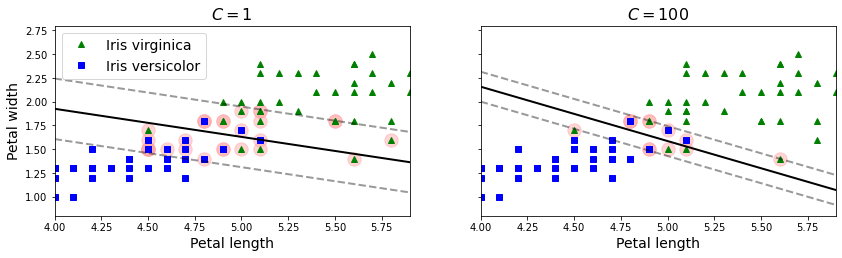

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 3.5), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])
plt.show()

In [36]:
#It may seem like a nice idea to have as few margin violations as possible, with higher training data classification accuracy. 
#However, pushing C very high is likely to result in the SVC model overfitting the training data (low bias, high variance). 
#Even in the example above with slightly high C=100, the "road" is narrow and defined by few data points. 
#The C=1 model has more margin violations, but has a wider road with more supporting vectors. 
#C=1 may therefore generalize better to unseen data, but that is by no means certain as it may just be underfitting the training set (high bias, low variance) if C goes too low.
# You can't be certain which values of C are going to work best on unseen data, and there's no "best" number of support vectors. As usual, cross validation is the best way to tune the model.

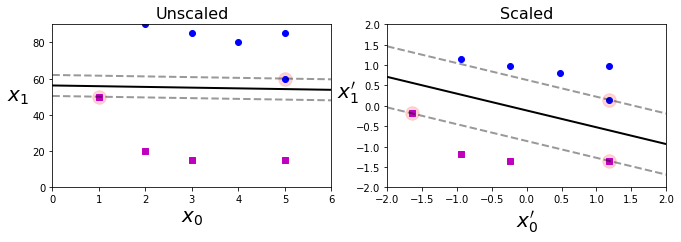

In [8]:
#Creates an artificial dataset of 9 samples with two features each
Xs = np.array([[1, 50], [5, 15], [2,20], [3,15], [3, 85], [5, 60], [4, 80], [5,85], [2,90]]).astype(np.float64)
#Defines the labels for the samples in Xs
ys = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

#Instantiates an SVM classifier with a linear kernel and regularization parameter C set to 100.
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)#Trains the SVM classifier on the unscaled data.

#Visualization of Decision Boundary on Unscaled Data
plt.figure(figsize=(11,3))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

#Scales Xs using StandardScaler which standardizes the features by removing the mean and scaling to unit variance.
scaler_example = StandardScaler()
X_scaled = scaler_example.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)# Trains the SVM classifier on the scaled data.
#Visualization of Decision Boundary on Scaled Data
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0'$", fontsize=20)
plt.ylabel("$x_1'$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

plt.show()

In [38]:
#Summary
#To summarize, the entire point of the SVM algorithm is to find the best possible linear decision boundary, which leads to:

#maximum margin classification --> hard margin classifier models (elegant but impractical)
#soft margin --> support vector classifier (good linear classifier)
#kernel trick --> support vector machine (efficient nonlinear classifier)
#Other important things to remember:

#support vectors define margin edges
#The lower the C, the softer the margin (more towards high bias and low variance, possible underfit)
#the higher the C, the harder the margin (more towards low bias and high variance, possible overfit)

In [9]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

svc1 = SVC(kernel="linear", C=10.0, probability=False) # "inf" C forces hard margin classification, which is not solvable here
svc1.fit(X,y);

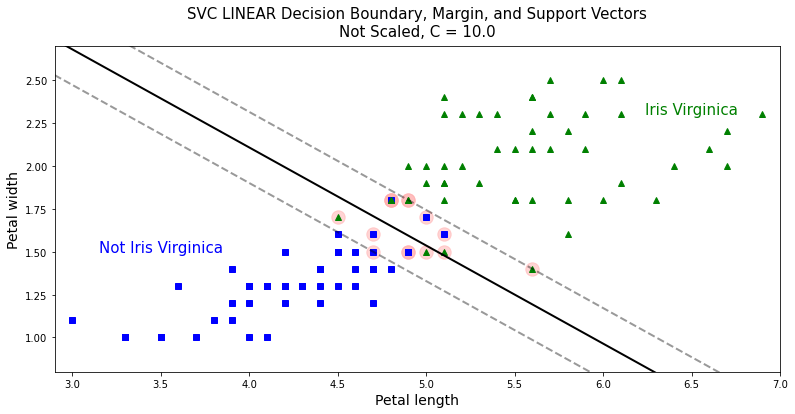

In [10]:


plt.figure(figsize=(13, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

plot_svc_decision_boundary(svc1, 2.5, 7.0)

plt.text(3.5, 1.5, "Not Iris Virginica", fontsize=15, color="b", ha="center")
plt.text(6.5, 2.3, "Iris Virginica", fontsize=15, color="g", ha="center")

plt.title("SVC LINEAR Decision Boundary, Margin, and Support Vectors\nNot Scaled, C = {}".format(svc1.C), fontsize=15, pad=10)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

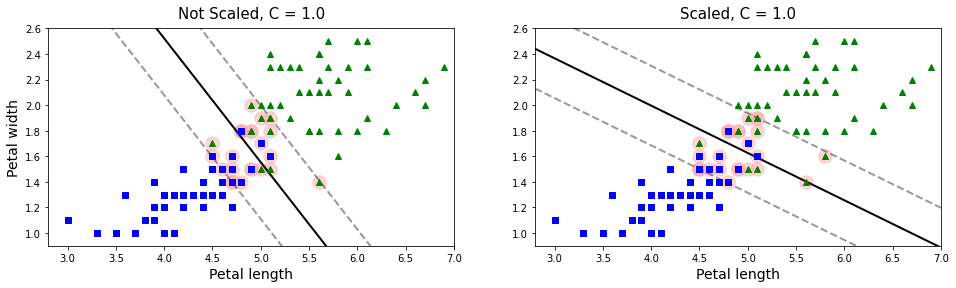

In [11]:
#The function is defined to plot the decision boundary of an SVM classifier. 
#If a scaler is passed, it will adjust the support vectors and parameters to reflect the unscaled data.
#The function calculates and plots the decision boundary, upper margin, and lower margin. 
#It also marks the support vectors on the plot.
def plot_svc_decision_boundary(svm_clf, xmin, xmax, passed_scaler=None):
    if passed_scaler: # then unscale support vectors and parameters
        svs = passed_scaler.inverse_transform(svm_clf.support_vectors_)
        w = svm_clf.coef_[0] / passed_scaler.scale_
        b = svm_clf.decision_function([-passed_scaler.mean_ / passed_scaler.scale_])
    else:
        svs = svm_clf.support_vectors_
        w = svm_clf.coef_[0]
        b = svm_clf.intercept_[0]
    
    # At the decision boundary, 0 = w0*x0 + w1*x1 + b
    #                       => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, alpha=.4)
    plt.plot(x0, gutter_down, "k--", linewidth=2, alpha=.4)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', alpha=.5)


C_inverse_regularization = 1.0
svc1 = SVC(kernel="linear", C=C_inverse_regularization) # "inf" C forces hard margin classification, which is not solvable here
svc1.fit(X,y);

svc2_scaled = SVC(kernel="linear", C=C_inverse_regularization) # "inf" C forces hard margin classification, which is not solvable here
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svc2_scaled.fit(X_scaled,y);

fig, axes = plt.subplots(ncols=2, figsize=(16,4), sharey=False)

plt.sca(axes[0])
plot_svc_decision_boundary(svc1, 2.8, 7)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Not Scaled, C = {}".format(svc1.C), fontsize=15, pad=10)
plt.axis([2.8, 7, .9, 2.6])

plt.sca(axes[1])
plot_svc_decision_boundary(svc2_scaled, 2.8, 7, passed_scaler = scaler)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.xlabel("Petal length", fontsize=14)
plt.title("Scaled, C = {}".format(svc2_scaled.C), fontsize=15, pad=10)
plt.axis([2.8, 7, .9, 2.6])
plt.show()

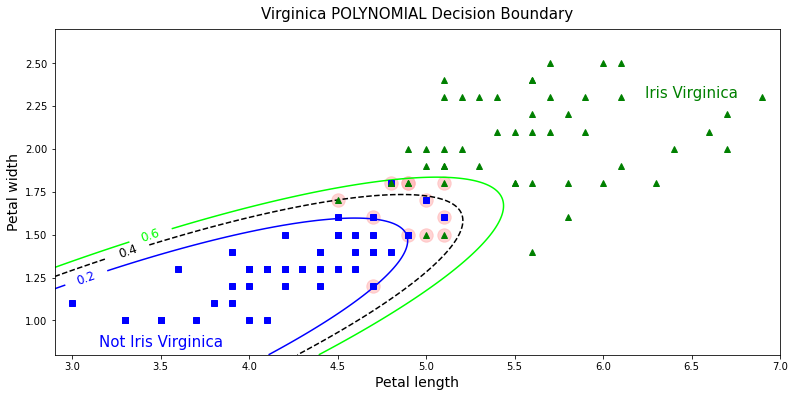

Wall time: 575 ms


In [12]:

%%time

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)
poly_features = PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
X = poly_features.fit_transform(X)

prob = True
using_SVC = True
if using_SVC:
    svc_poly1 = SVC(kernel="linear", C=1000.0, probability=prob, random_state=0)
else:
    svc_poly1 = LogisticRegression(solver="liblinear", C=10**3, random_state=42)

svc_poly1.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = poly_features.fit_transform(X_new)

plt.figure(figsize=(13, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

if using_SVC:
    svs = svc_poly1.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', alpha=.5) # plot support vectors
    if prob:
        y_proba = svc_poly1.predict_proba(X_new)
        zz = y_proba[:, 1].reshape(x0.shape)
    else:
        y_proba = svc_poly1.decision_function(X_new)
        zz = y_proba.reshape(x0.shape)
    contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg, levels = np.array([.2, .6]))
    boundary_contour = plt.contour(x0, x1, zz, colors = "k", linestyles='dashed', levels = np.array([.4]))
else:
    y_proba = svc_poly1.predict_proba(X_new)
    zz = y_proba[:, 1].reshape(x0.shape)
    contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg, levels = np.array([.2, .8]))
    boundary_contour = plt.contour(x0, x1, zz, colors = "k", linestyles='dashed', levels = np.array([.5]))

plt.clabel(contour, inline=True, fontsize=12)
plt.clabel(boundary_contour, inline=True, fontsize=12)
plt.text(3.5, .85, "Not Iris Virginica", fontsize=15, color="b", ha="center")
plt.text(6.5, 2.3, "Iris Virginica", fontsize=15, color="g", ha="center")

plt.title("Virginica POLYNOMIAL Decision Boundary", fontsize=15, pad=10)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

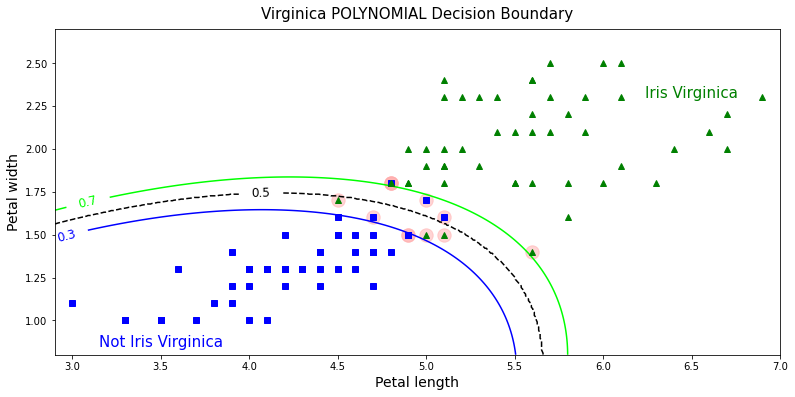

Wall time: 350 ms


In [15]:
%%time

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int) #Iris Virginica is labeled as 1 and the other species as 0.
# Initializes an SVM classifier with a polynomial kernel of degree 2,
# coefficient coef0 set to 1, and regularization parameter C set to 1000. 
svc_poly2 = SVC(kernel="poly", degree=2, coef0=1, C=1000.0, probability=prob, random_state=1)
svc_poly2.fit(X, y)#Trains the SVM classifier on the dataset.


#creates a grid of values for petal length (x0) and petal width (x1),
# which is used to evaluate and visualize the decision function over the feature space.
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
#Plots the data points, using blue squares for non-Virginica and green triangles for Virginica.
plt.figure(figsize=(13, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")


svs = svc_poly2.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', alpha=.5) # plot support vectors

if prob:
    y_proba = svc_poly2.predict_proba(X_new)
    zz = y_proba[:, 1].reshape(x0.shape)
else:
    y_proba = svc_poly2.decision_function(X_new)
    zz = y_proba.reshape(x0.shape)

contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg, levels = np.array([.3, .7]))#lines visualize the decision function and the decision boundary, respectively.
boundary_contour = plt.contour(x0, x1, zz, colors = "k", linestyles='dashed', levels = np.array([.5]))

plt.clabel(contour, inline=True, fontsize=12)
plt.clabel(boundary_contour, inline=True, fontsize=12)
plt.text(3.5, .85, "Not Iris Virginica", fontsize=15, color="b", ha="center")
plt.text(6.5, 2.3, "Iris Virginica", fontsize=15, color="g", ha="center")

plt.title("Virginica POLYNOMIAL Decision Boundary", fontsize=15, pad=10)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [44]:
#Multiclass Classification
#Some machine learning algorithms (SGD, random forest, naive Bayes) handle multiple classes natively. Others such as SVC are naturally binary classifiers. There are a number of ways to extend binary classifiers to multiclass (multinomial) classifiers capable of distinguishing between more than 2 classes. These include:

#One-vs-the-Rest (OvR) Train a separate classifier model for each of the classes: 20 classes means 20 classifier models. Predict by selecting the class whose classifier has highest score for the sample.
#One-vs-One (OvO) Train a classifier for each pair of classes. 20 classes would require n*(n-1) = 380 classifiers so this doesn't scale to a large number of classes. However, some algorithms (i.e. SVM) don't scale well to large training sets, so OvO can speed up training in such cases if the number of classes isn't too large.
#Train a classifier for each pairing with a baseline class (p. 140 Introduction to Statistical Learning)
#Softmax (but only works for logistic regression and a few other algorithms - can't use for SVM)
#The following plot(s) uses Scikit-Learn's SVC multiclass support, which according to Scikit-Learn documentation "is handled according to a one-vs-one scheme" for SVC and NuSVC (note: Linear SVC uses one vs. the rest).

#The plot displays the decision boundaries, represented by the background colors. Also displayed are probabilities for the Iris versicolor class, represented by the curved lines. The dashed black line is the 0.5 threshold for versicolor, which roughly corresponds to the decision boundary. Recall that SVC does NOT generate probabilities natively, so these probabilities are estimated using SciKit SVC's built-in method.

#The goal is to distinguish between the 3 classes of Iris plant varieties, displaying results in an easy-to-interpret plot:

In [13]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

def plot_svc(model, class_num):
    x0, x1 = np.meshgrid(
            np.linspace(0, 7, 500).reshape(-1, 1),
            np.linspace(0, 3.5, 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_proba = model.predict_proba(X_new)
    y_predict = model.predict(X_new)

    zz1 = y_proba[:, class_num].reshape(x0.shape)
    zz = y_predict.reshape(x0.shape)

    plt.figure(figsize=(12, 6))
    plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
    plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
    plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    boundary_contour = plt.contour(x0, x1, zz1, colors = "k", linestyles='dashed', levels = [.5])
    contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg, levels = np.array([.25, .75]))
    plt.clabel(boundary_contour, inline=True, fontsize=12)
    plt.clabel(contour, inline=1, fontsize=12)

    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="center left", fontsize=14)
    plt.axis([0, 7, 0, 3.5])
    if model.kernel == "poly":
        plt.title("SVC, C = {}, Kernel = {}, degree = {}".format(model.C, model.kernel, model.degree), fontsize=15, pad=10)
    else:
        plt.title("SVC, C = {}, Kernel = {}".format(model.C, model.kernel), fontsize=15, pad=10)
        
    svs = model.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', alpha=1) # plot support vectors
    plt.show()

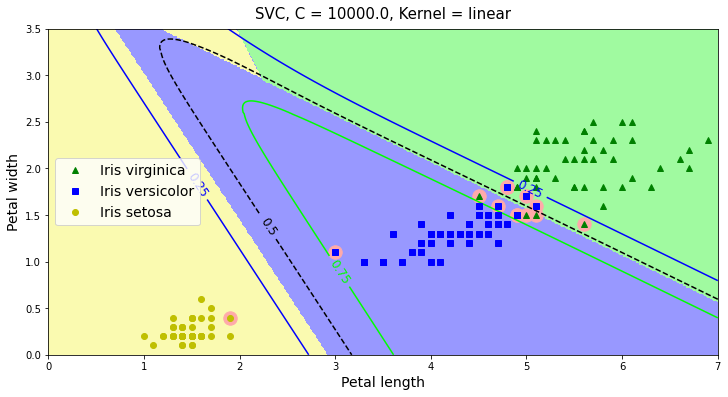

In [14]:
svc3 = SVC(kernel="linear", C=10000.0, random_state=1, probability=True)
svc3.fit(X, y)
plot_svc(svc3, 1) # setosa=0, versicolor=1, virginica=2

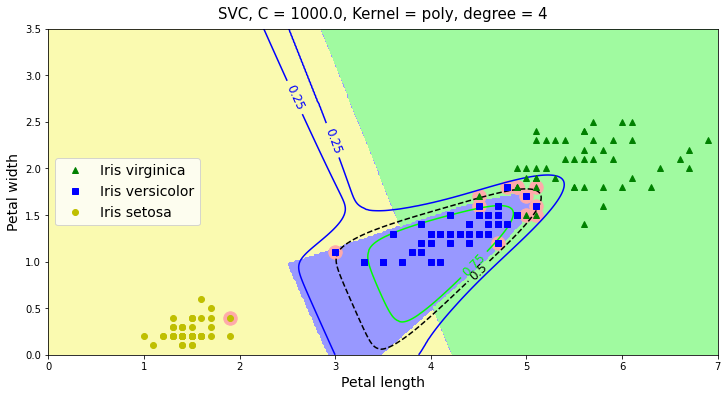

In [15]:
svc3 = SVC(kernel="poly", degree=4, coef0=1, C=1000.0, probability=True, random_state=1)
svc3.fit(X, y)
plot_svc(svc3, 1) # setosa=0, versicolor=1, virginica=2

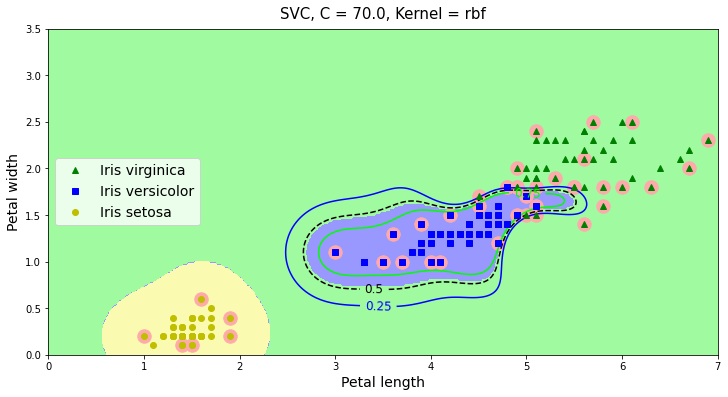

In [16]:
svc3 = SVC(kernel="rbf", gamma=5, C=70.0, probability=True, random_state=1)
svc3.fit(X, y)
plot_svc(svc3, 1) # setosa=0, versicolor=1, virginica=2

In [49]:
#The support vectors (highlighted pink circles) were already more complex to interpret for multiclass classification using a linear kernel. The poly kernel makes a little more intuitive sense, while the RBF (Gaussian Radial Basis Function) kernel has a completely different concept for support vectors, circling each class like a clustering algorithm.

#The above plots display the original data with (an approximation of) the nonlinear fit. What was NOT displayed was what the kernels are doing conceptually, which in oversimplified terms is:

#mapping to a higher dimensional space
#separating the mapped data with a hyperplane
#remapping the data back to the original form
#So the SVM is still using the same algorithm of finding the optimal soft margin separating hyperplane, but thanks to the kernel trick is doing this in higher dimensional space. It can even be infinite dimensions, as is the case with the RBF kernel.

In [17]:
#Linear SVM classifier implementation using Batch Gradient Descent(optional)
# Training set
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris virginica



#C: Regularization parameter. Controls the trade-off between having a smooth decision boundary and classifying the training points correctly.
#eta0: Initial learning rate for the gradient descent optimization.
#eta_d: Parameter used to adjust the learning rate over time (learning schedule).
#n_epochs: The number of epochs or iterations the gradient descent algorithm will run for.


from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d
#Computes and returns the learning rate at a given epoch. As the number of epochs increases, the learning rate decreases.
    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1) # n feature weights
        b = 0

        m = len(X)
        t = y * 2 - 1  # -1 if y==0, +1 if y==1
        X_t = X * t
        self.Js=[]

        #Iterates over the specified number of epochs:
        #Identifies the support vectors (the instances located within the “street” or margin).
        #Computes the cost function J (Objective to minimize).
        #Calculates the gradient of the cost with respect to weights and bias.
        #Updates weights w and bias b using gradient descent.
        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
            self.Js.append(J)

            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
            b_derivative = -self.C * np.sum(t_sv)
                
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)

C=2
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[1.],
       [0.]])

(0.0, 60000.0, 0.0, 100.0)

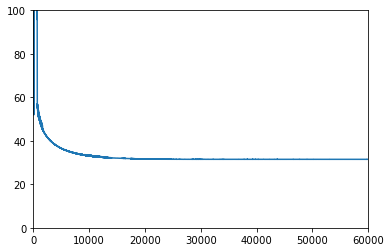

In [18]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])

In [19]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [20]:
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


(4.0, 6.0, 0.8, 2.8)

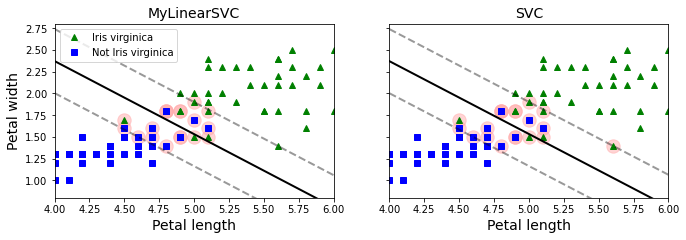

In [21]:
yr = y.ravel()
fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.sca(axes[0])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("MyLinearSVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc="upper left")

plt.sca(axes[1])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("SVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
